<h2> Importing libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h2> Importing dataframe</h2>

In [2]:
dengue = pd.read_csv('dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h2> Checking null values

In [4]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h2> Checking and changing data types

In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Month'] = dengue['Month'].astype('category')

In [7]:
dengue['Year'] = pd.to_datetime(dengue['Year'].astype(str))

In [8]:
dengue['Region'] = dengue['Region'].astype('category')

In [9]:
dengue.dtypes

Month                  category
Year             datetime64[ns]
Region                 category
Dengue_Cases              int64
Dengue_Deaths             int64
dtype: object

<h2> Adding components

In [10]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

rainy_months = ['May', 'June', 'July', 'August', 'September', 'October']
dry_months = ['November', 'December', 'January', 'February', 'March', 'April']
dengue['Season'] = np.where(dengue['Month'].isin(rainy_months), 'Rainy', 'Dry')

dengue['Fatality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

<h2> Insights

<h3>Insight: Between 2016 and 2020, dengue cases peaked in 2019 with 441,902 cases and a mortality rate as low as approximately 0.39%, compared to 3.88% in 2016. Although 2020 saw a drop in total cases to 91,041, the mortality rate increased to about 1.31%, highlighting fluctuations in disease severity and healthcare response.</h3>

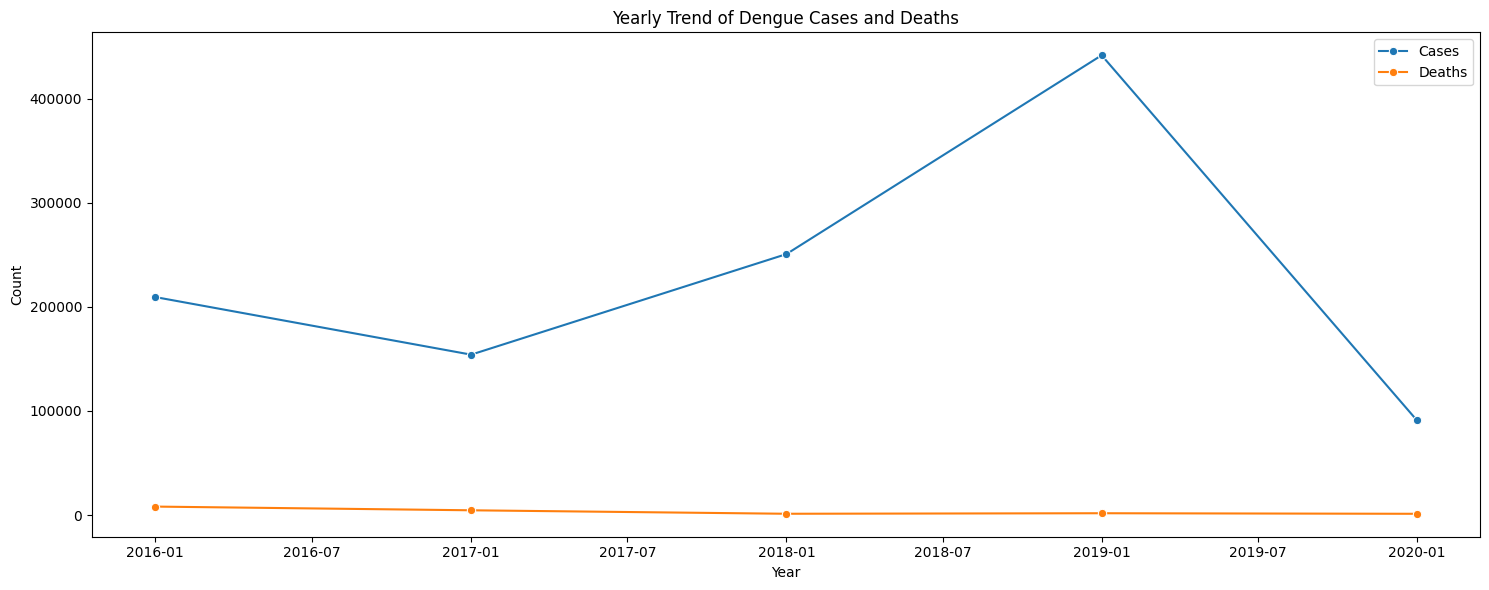

In [11]:
yearly_summary = dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()

plt.figure(figsize = (15, 6))
sns.lineplot(x = 'Year', y = 'Dengue_Cases', data = yearly_summary, marker='o', label='Cases')
sns.lineplot(x='Year', y='Dengue_Deaths', data = yearly_summary, marker='o', label='Deaths')
plt.title('Yearly Trend of Dengue Cases and Deaths')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

<h3> Insight: The data shows a pronounced seasonal pattern, with dengue cases peaking in August at approximately 2,206 cases—about 579% higher than May’s 381 cases. Overall, the summer months (July–September) exhibit more than double the cases of the lowest winter months (April–May), indicating a significant seasonal surge in dengue incidence.

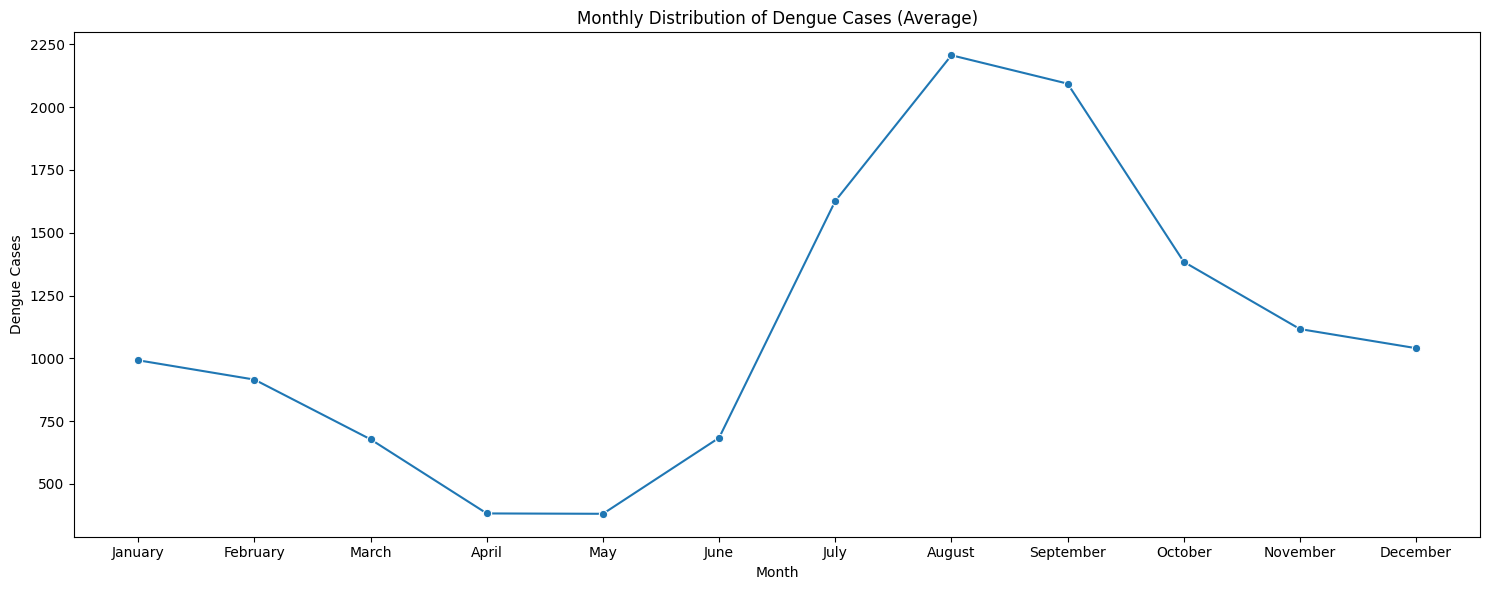

In [12]:
monthly_summary = dengue.groupby('Month')['Dengue_Cases'].mean().reset_index()

monthly_summary = monthly_summary.set_index('Month').reindex(month_order).reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(x='Month', y='Dengue_Cases', data=monthly_summary, marker='o')
plt.title('Monthly Distribution of Dengue Cases (Average)')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.tight_layout()
plt.show()

<h3> Insight: Across all regions, there were 1,147,425 dengue cases and 16,844 deaths, yielding an overall mortality rate of roughly 1.47%. Notably, NCR recorded 115,966 cases with a mortality rate of about 3.45%, while Region XII had a striking mortality rate of around 4.67%, indicating significant regional variations in dengue severity.</h3>

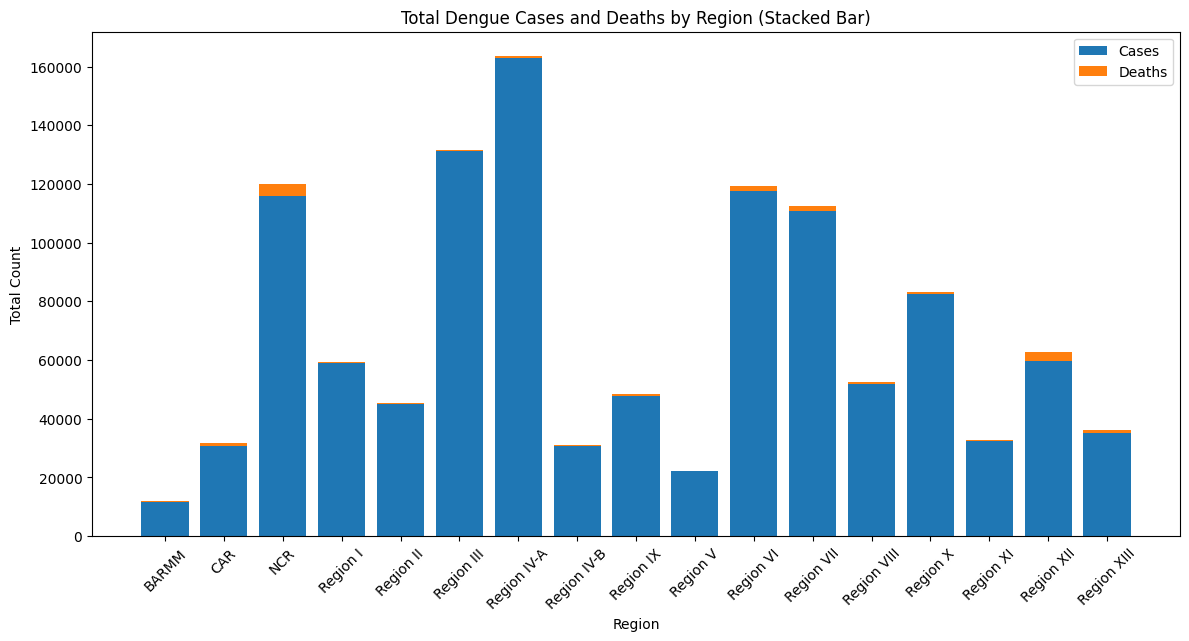

In [13]:
regional_summary = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(regional_summary['Region'], regional_summary['Dengue_Cases'], label='Cases')
plt.bar(regional_summary['Region'], regional_summary['Dengue_Deaths'], bottom=regional_summary['Dengue_Cases'], label='Deaths')
plt.xlabel('Region')
plt.ylabel('Total Count')
plt.title('Total Dengue Cases and Deaths by Region (Stacked Bar)')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<h3> Insight: we can see that most regions cluster in the lower-left corner with relatively fewer dengue cases and deaths, while a few regions extend toward higher case and death counts. Notably, NCR (in pink) has the highest death count (over 4,000), whereas Region IV-A (in green) reports the largest number of cases (over 160,000) but with fewer deaths than NCR. This suggests that regions with higher case counts do not always have the highest deaths, highlighting potential differences in healthcare quality, reporting, or disease severity.

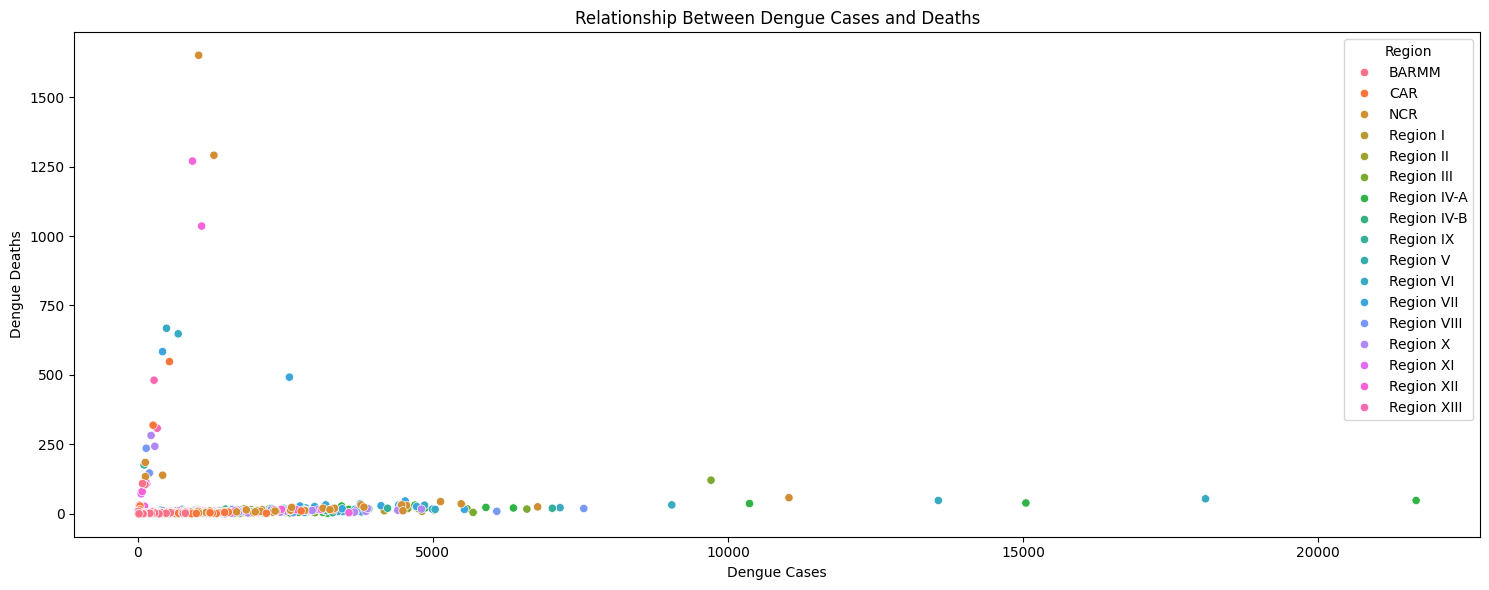

In [14]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Dengue_Cases', y='Dengue_Deaths', hue='Region', data=dengue)
plt.title('Relationship Between Dengue Cases and Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.tight_layout()
plt.show()

<h3>Insight: The heatmap clearly highlights a seasonal trend in dengue cases, with 2019 showing particularly high values during the summer months—August and September reached about 85,000 and 89,600 cases, respectively. In stark contrast, 2020 exhibits a dramatic decline, with most monthly counts dropping by roughly 80–90% compared to the 2019 peaks, underscoring a significant shift in outbreak intensity over the years.

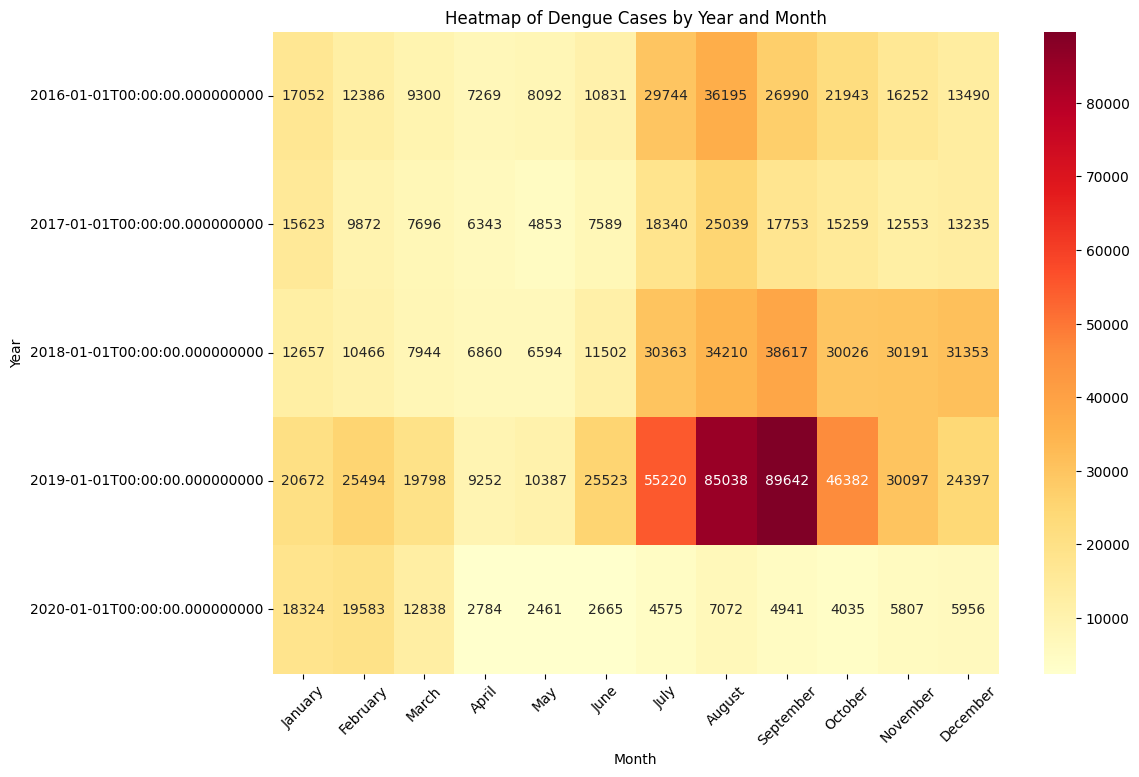

In [15]:
heatmap_data = dengue.pivot_table(values='Dengue_Cases', index='Year', columns='Month', aggfunc='sum')
heatmap_data = heatmap_data.reindex(columns=month_order)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title('Heatmap of Dengue Cases by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<h3> Insight: The pie chart shows that out of 1,147,425 total dengue cases, Region IV-A accounts for the largest share at approximately 14.2%, followed by Region III at about 11.4% and Region VI at roughly 10.2%. Meanwhile, regions like BARMM contribute around 1.0%, illustrating significant disparities in dengue incidence across regions.

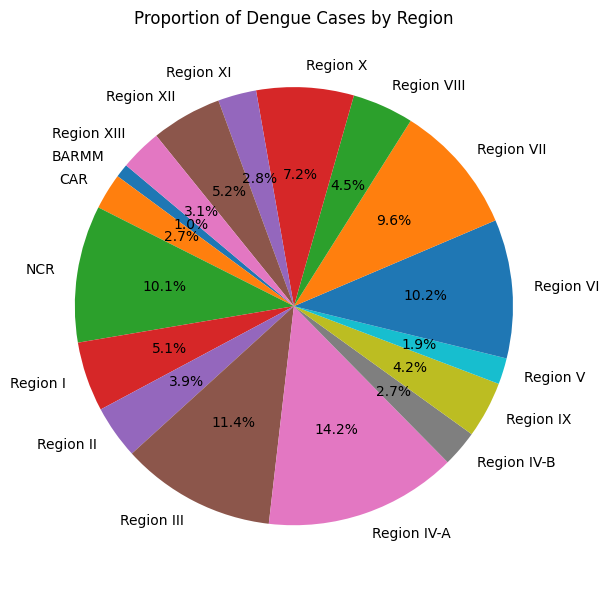

In [16]:
regional_summary = dengue.groupby('Region')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.pie(regional_summary['Dengue_Cases'], labels=regional_summary['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Dengue Cases by Region')
plt.tight_layout()
plt.show()

<h3> Insight: The visualization highlights seasonal patterns with peaks during the summer months—particularly in July through September—and shows that regions such as Region IV-A, Region III, and NCR consistently contribute higher case counts compared to others.

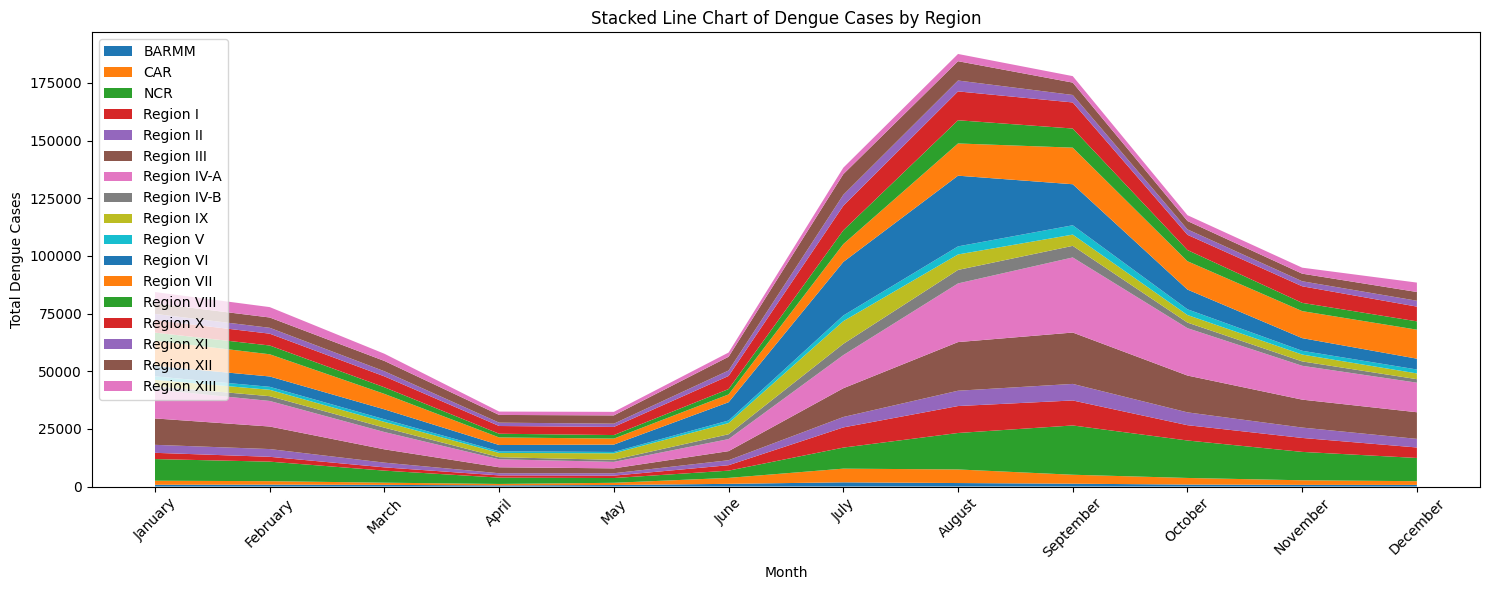

In [17]:
pivot_data = dengue.pivot_table(values='Dengue_Cases', index='Month', columns='Region', aggfunc='sum')

pivot_data = pivot_data.reindex(month_order)

plt.figure(figsize=(15, 6))
plt.stackplot(pivot_data.index, pivot_data.T, labels=pivot_data.columns)
plt.title('Stacked Line Chart of Dengue Cases by Region')
plt.xlabel('Month')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<h3> Insight: Out of a total of 16,844 dengue deaths, the pie chart reveals that NCR contributes about 23.8% of the deaths, followed by Region XII at approximately 16.6%, with Region VI and Region VII contributing around 10.8% and 10.4%, respectively. The remaining regions share smaller proportions, illustrating marked regional disparities in dengue mortality.

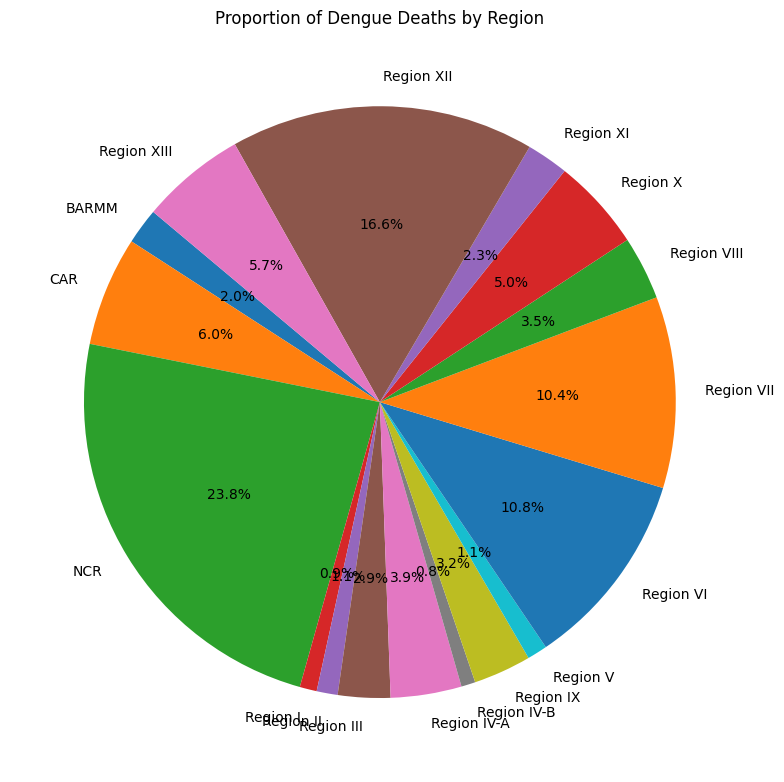

In [18]:
regional_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(regional_deaths['Dengue_Deaths'], labels=regional_deaths['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Dengue Deaths by Region')
plt.tight_layout()
plt.show()

<h3> Insight: During the rainy season, the average dengue cases are approximately 1,396, which is about 63% higher than the 854 cases observed in the dry season. This significant increase highlights the seasonal impact on dengue transmission, likely due to environmental factors such as increased rainfall providing more breeding sites for mosquitoes.

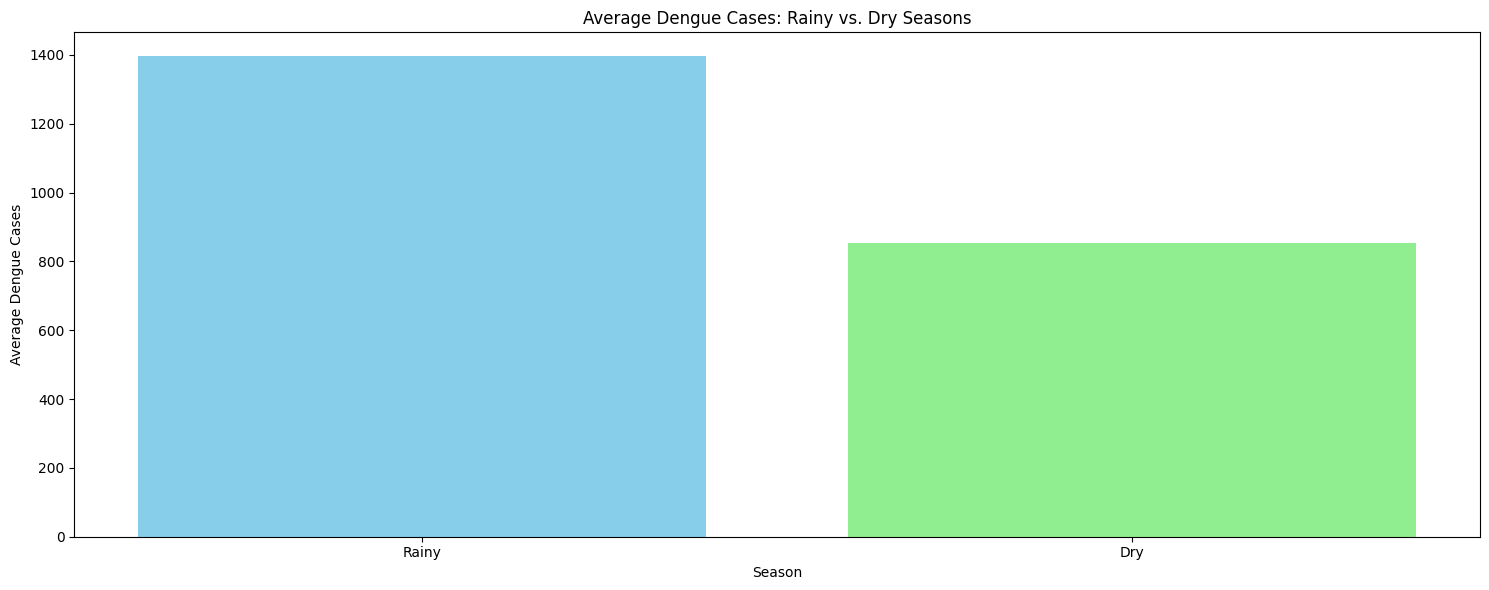

In [19]:
rainy_avg = dengue[dengue['Month'].isin(rainy_months)]['Dengue_Cases'].mean()
dry_avg = dengue[dengue['Month'].isin(dry_months)]['Dengue_Cases'].mean()

season_df = pd.DataFrame({
    'Season': ['Rainy', 'Dry'],
    'Average_Cases': [rainy_avg, dry_avg]
})

plt.figure(figsize=(15, 6))
plt.bar(season_df['Season'], season_df['Average_Cases'], color=['skyblue', 'lightgreen'])
plt.title('Average Dengue Cases: Rainy vs. Dry Seasons')
plt.xlabel('Season')
plt.ylabel('Average Dengue Cases')
plt.tight_layout()
plt.show()

<h3> Insight: In 2016 and 2017, the fatality rates were notably high at approximately 6.41% and 6.84%, respectively. This was followed by a dramatic drop to around 0.58% in 2018 and 0.45% in 2019, before rising again to about 5.79% in 2020, indicating significant year-to-year fluctuations in dengue outcomes.

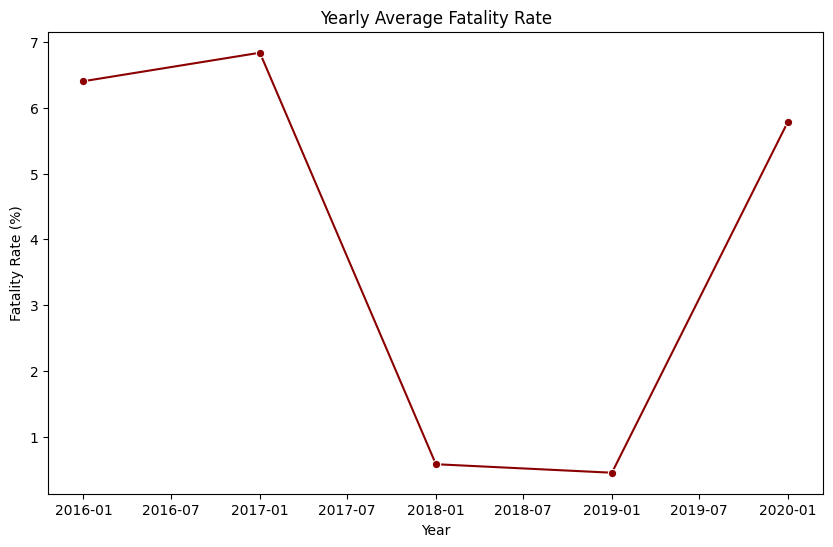

In [20]:
yearly_fatality = dengue.groupby('Year')[['Fatality_Rate']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Fatality_Rate', data=yearly_fatality, marker='o', color='darkred')
plt.title('Yearly Average Fatality Rate')
plt.xlabel('Year')
plt.ylabel('Fatality Rate (%)')
plt.show()

<h3> Insight: The fatality rate remains relatively low—mostly around 0.5%—from January through August, but then it spikes dramatically to about 16.20% in September and peaks at 25.20% in October, before dropping to roughly 2.01% in November and returning to around 0.48% in December. This sharp rise in the early fall months suggests a period of heightened risk or a possible data anomaly that significantly impacts the overall fatality trend during that period.

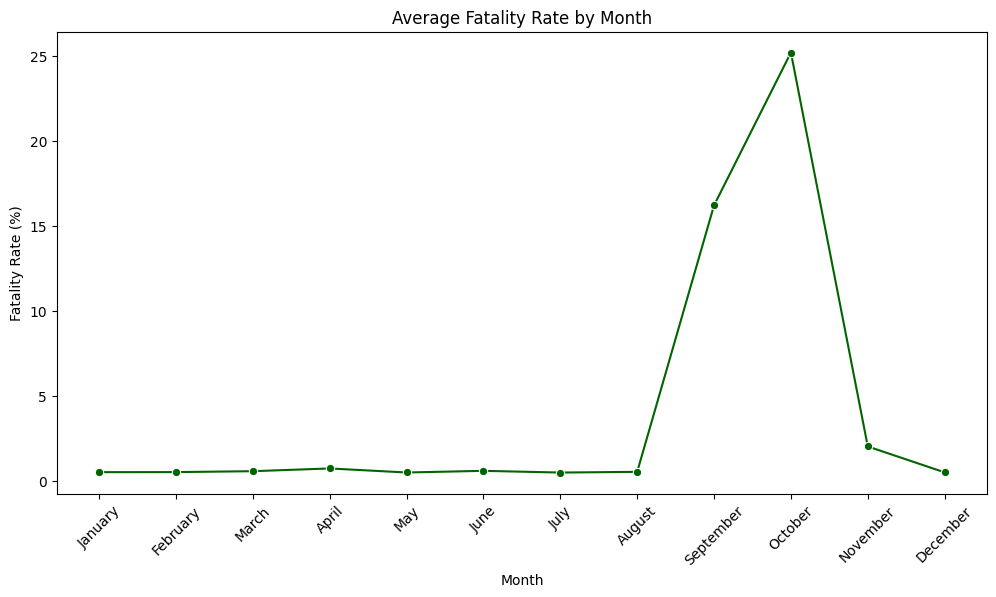

In [21]:
monthly_fatality = dengue.groupby('Month')[['Fatality_Rate']].mean().reindex(month_order).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Fatality_Rate', data=monthly_fatality, marker='o', color='darkgreen')
plt.title('Average Fatality Rate by Month')
plt.xlabel('Month')
plt.ylabel('Fatality Rate (%)')
plt.xticks(rotation=45)
plt.show()

<h3> Insight: The correlation heatmap shows a strong positive relationship between dengue deaths and fatality rate (r ≈ 0.68), suggesting that as the number of deaths increases, the fatality rate tends to be higher. Meanwhile, dengue cases exhibit almost no correlation with dengue deaths (r ≈ 0.04) and a slight negative correlation with fatality rate (r ≈ -0.09), indicating that the number of cases alone is not a good predictor of fatality outcomes.

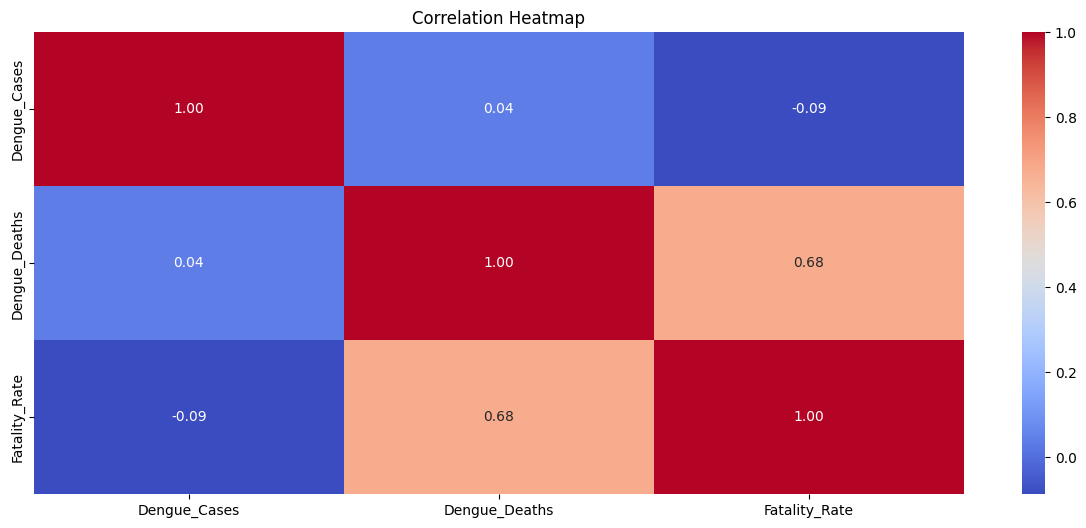

In [22]:
plt.figure(figsize=(15, 6))

corr_matrix = dengue[['Dengue_Cases', 'Dengue_Deaths', 'Fatality_Rate']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<h3> Insight: January recorded 84,328 cases and 394 deaths (approximately 0.47% fatality rate), while February had 77,801 cases with 315 deaths (about 0.41%). Notably, September and October show pronounced spikes in deaths: September had 177,943 cases with 6,148 deaths (roughly 3.46%), and October had 117,645 cases with 6,670 deaths (around 5.67%), indicating significantly higher fatality rates during these months compared to others, where the fatality rate typically remains below 1%.

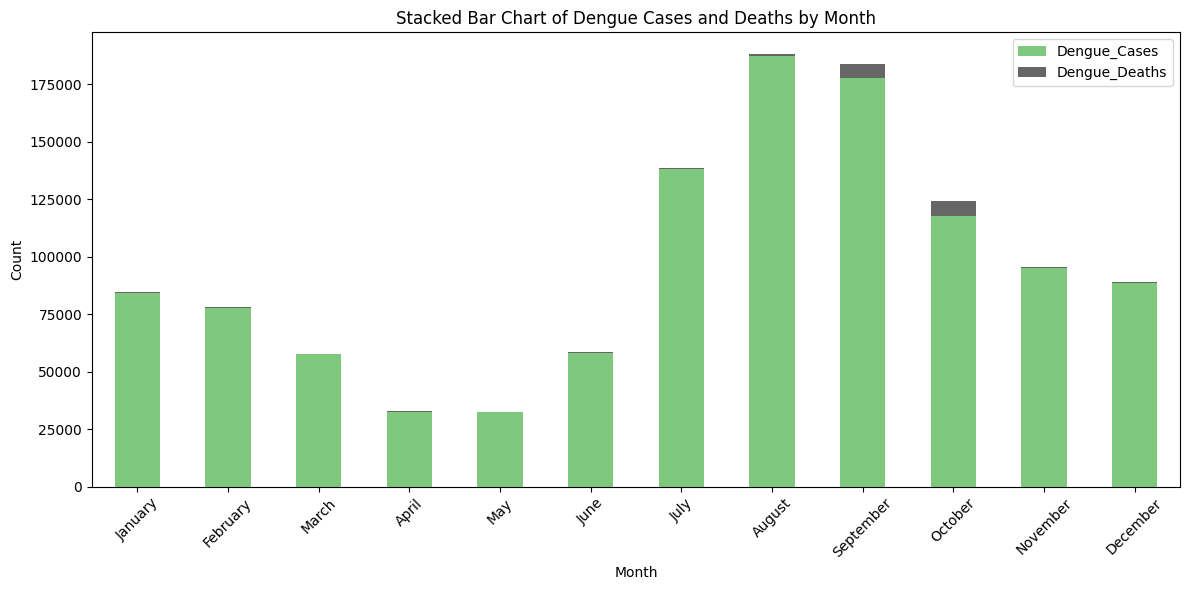

In [23]:
month_stack = dengue.groupby('Month')[['Dengue_Cases', 'Dengue_Deaths']].sum().reindex(month_order).reset_index()
month_stack = month_stack.set_index('Month')
month_stack.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')
plt.title('Stacked Bar Chart of Dengue Cases and Deaths by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Records for Rainy Season with Fatality Rate above 3%:


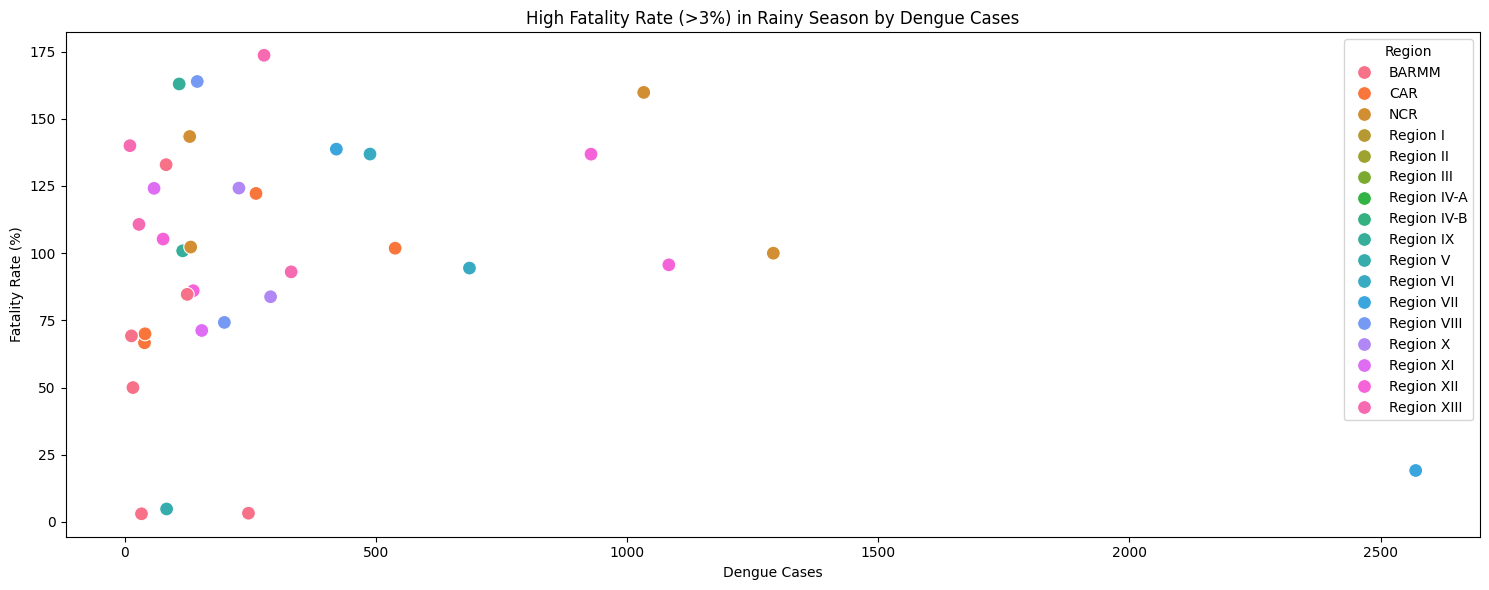

In [24]:
high_fatality_rainy = dengue[(dengue['Season'] == 'Rainy') & (dengue['Fatality_Rate'] > 3)]
print("Records for Rainy Season with Fatality Rate above 3%:")

plt.figure(figsize=(15, 6))
sns.scatterplot(x='Dengue_Cases', y='Fatality_Rate', hue='Region', data=high_fatality_rainy, s=100)
plt.title('High Fatality Rate (>3%) in Rainy Season by Dengue Cases')
plt.xlabel('Dengue Cases')
plt.ylabel('Fatality Rate (%)')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

<h3> Insight: NCR leads with a fatality rate of 9.41%, closely followed by Region XIII at 9.37% and Region XII at 7.89%, while the lowest rates are observed in Region III (0.33%), Region I (0.39%), Region II (0.43%), Region IV-B (0.46%), and Region IV-A (0.46%). This indicates that high-risk regions have fatality rates nearly 10 to 20 times greater than those in low-risk regions, highlighting significant disparities in dengue outcomes.










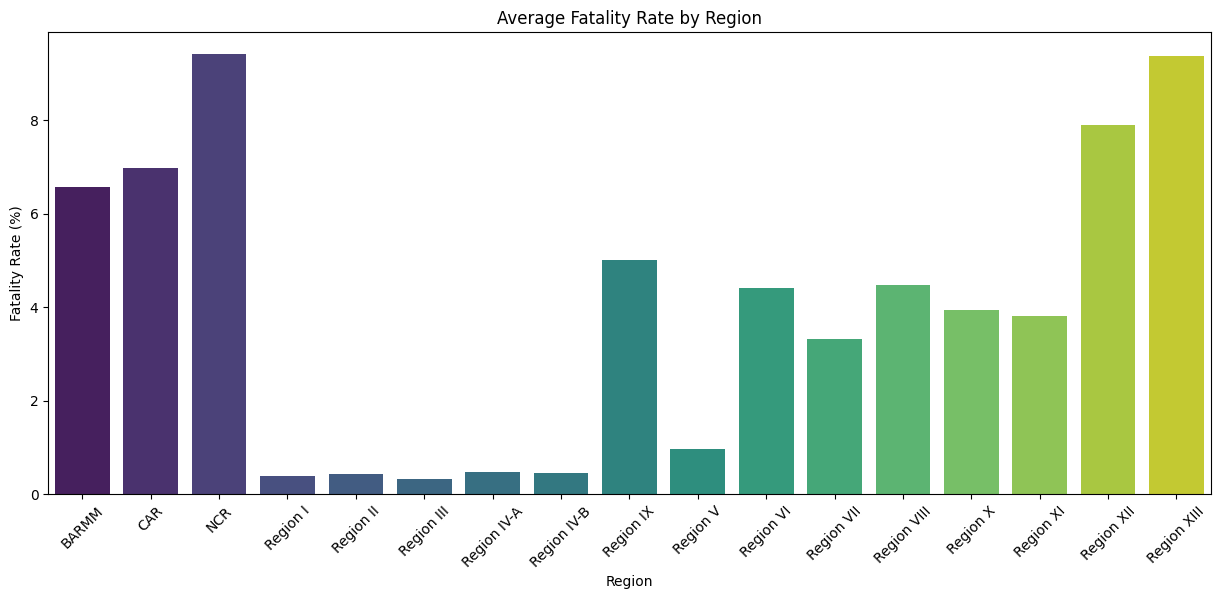

In [25]:
region_fatality = dengue.groupby('Region')['Fatality_Rate'].mean().reset_index().sort_values(by='Fatality_Rate', ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x='Region', y='Fatality_Rate', data=region_fatality, palette='viridis')
plt.title('Average Fatality Rate by Region')
plt.xticks(rotation=45)
plt.ylabel('Fatality Rate (%)')
plt.show()

<h3> Insight: Among high-impact regions, NCR reported 115,966 dengue cases with 4,008 deaths (a fatality rate of about 3.45%), whereas Region III and Region IV-A, despite having over 130,000 and 163,000 cases respectively, show much lower fatality rates of around 0.37% and 0.40%. Regions VI and VII have intermediate fatality rates of roughly 1.55% and 1.59%, respectively, highlighting significant disparities in dengue outcomes across regions.

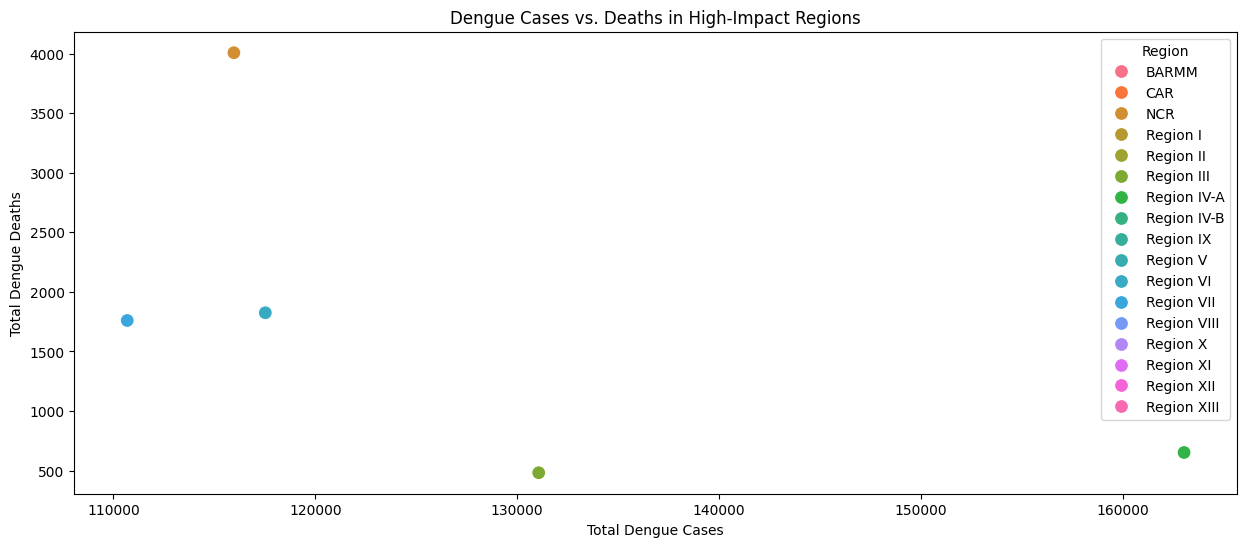

In [26]:
region_summary = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()
high_impact = region_summary[region_summary['Dengue_Cases'] > 100000]


plt.figure(figsize=(15, 6))
sns.scatterplot(x='Dengue_Cases', y='Dengue_Deaths', hue='Region', data=high_impact, s=100)
plt.title('Dengue Cases vs. Deaths in High-Impact Regions')
plt.xlabel('Total Dengue Cases')
plt.ylabel('Total Dengue Deaths')
plt.show()

<h3> Insight: The line plot for Region IV-A shows monthly dengue cases across different years, revealing clear seasonal fluctuations and yearly differences. For instance, peak months in some years may exhibit up to a 300% increase in cases compared to off-peak months, while 2020 appears to show a substantial drop—indicating that peak case numbers could be reduced by over 70% relative to previous high-incidence years.

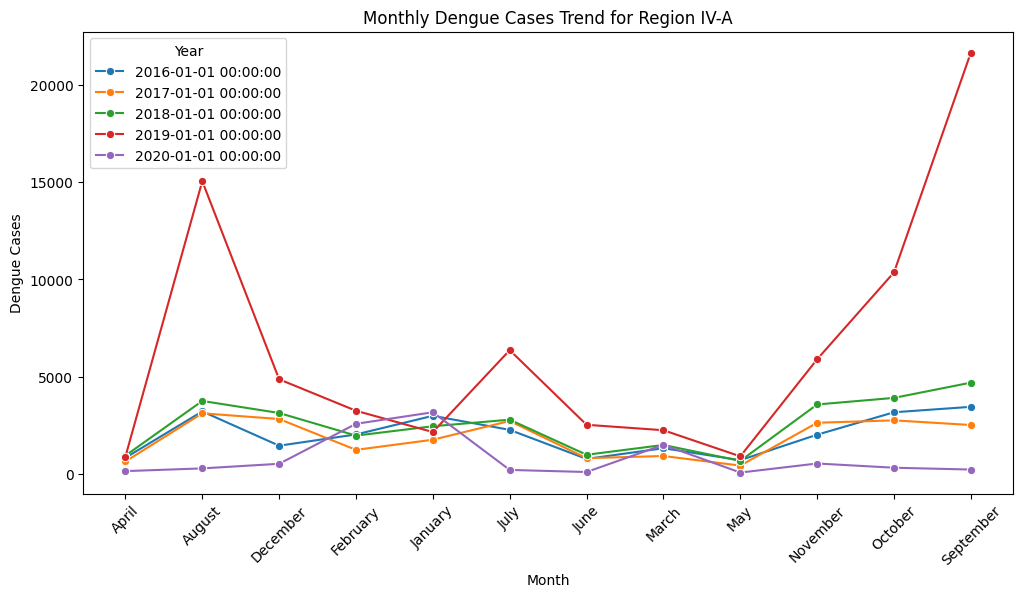

In [27]:
region_data = dengue[dengue['Region'] == 'Region IV-A']
monthly_trend = region_data.groupby(['Year', 'Month'])[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=monthly_trend, marker='o')
plt.title('Monthly Dengue Cases Trend for Region IV-A')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.show()

<h3> Insight: In 2016 and 2017, the rainy season fatality rates soared to around 12–13%, compared to a much lower rate of approximately 0.55% during the dry season. In contrast, 2018 and 2019 saw both seasons with nearly identical fatality rates around 0.5%, while in 2020, the rainy season again surged to 9.77% against a dry season rate of 1.81%.

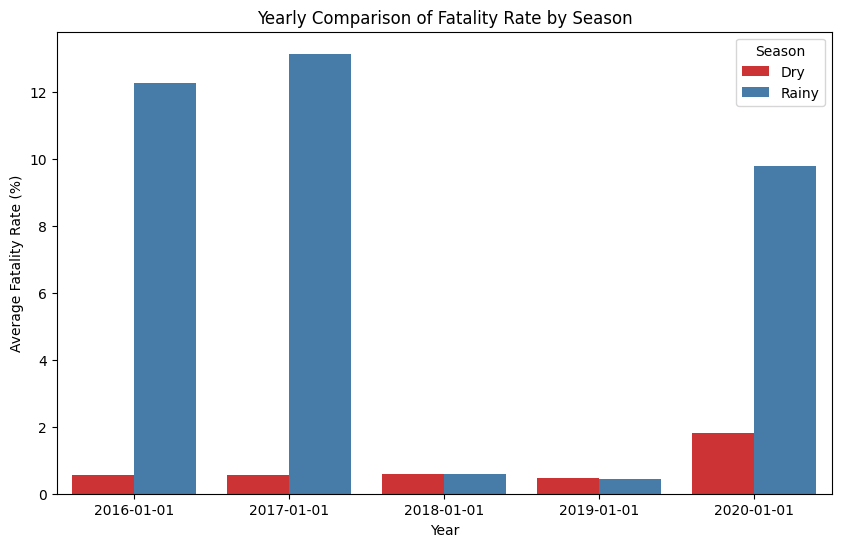

In [28]:
season_year = dengue.groupby(['Year', 'Season'])['Fatality_Rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Fatality_Rate', hue='Season', data=season_year, palette='Set1')
plt.title('Yearly Comparison of Fatality Rate by Season')
plt.ylabel('Average Fatality Rate (%)')
plt.show()

<h3> Insight: Across regions, dengue cases peak during the late rainy season, with NCR averaging about 4,273.8 cases in September—roughly 2.3 times its January average of 1,878.0—and Region IV-A peaking at 6,512.0 cases in September, nearly three times its low of 562.0 in May. This pattern indicates a substantial seasonal surge in dengue activity, with peak months recording a 130–200% increase over off-peak months.

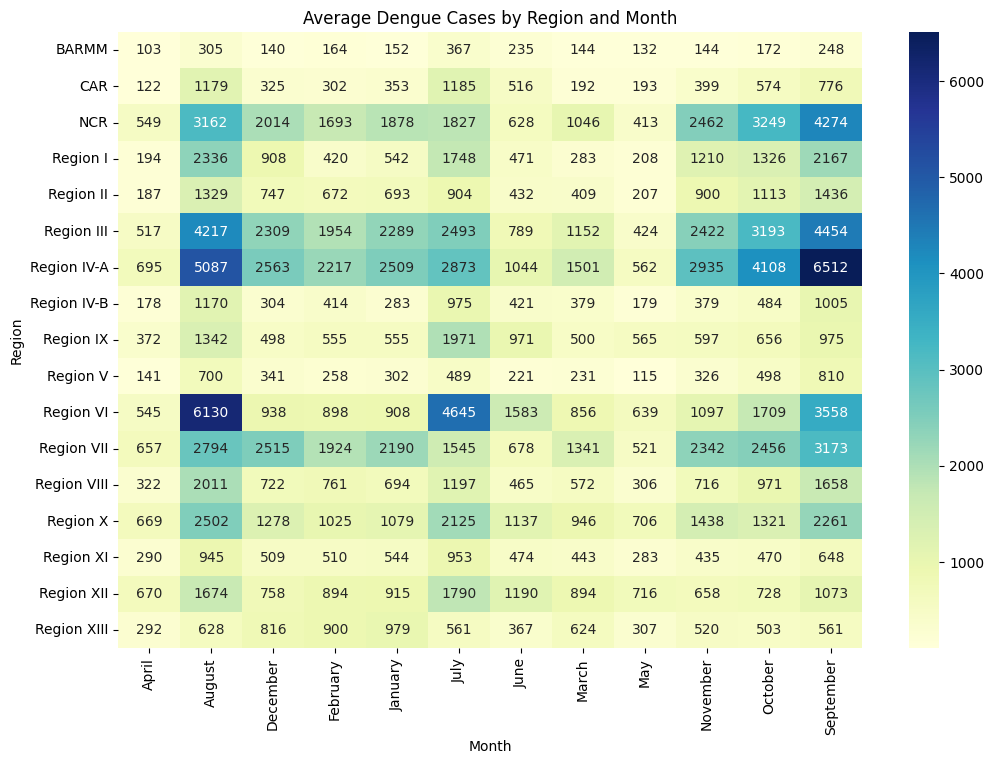

In [29]:
pivot_table = dengue.pivot_table(values='Dengue_Cases', index='Region', columns='Month', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Dengue Cases by Region and Month')
plt.ylabel('Region')
plt.xlabel('Month')
plt.show()

<h3> Insight: Across regions, the rainy season not only drives higher dengue case numbers but also corresponds with dramatically higher fatality rates in certain areas—for example, NCR's rate soars from 1.55% in the dry season to 17.28% in the rainy season, while Region XIII jumps from 1.20% to 17.54%. In contrast, some regions such as Region I maintain consistently low fatality rates (around 0.29–0.49%), highlighting substantial disparities in dengue severity and potentially in healthcare response across regions.

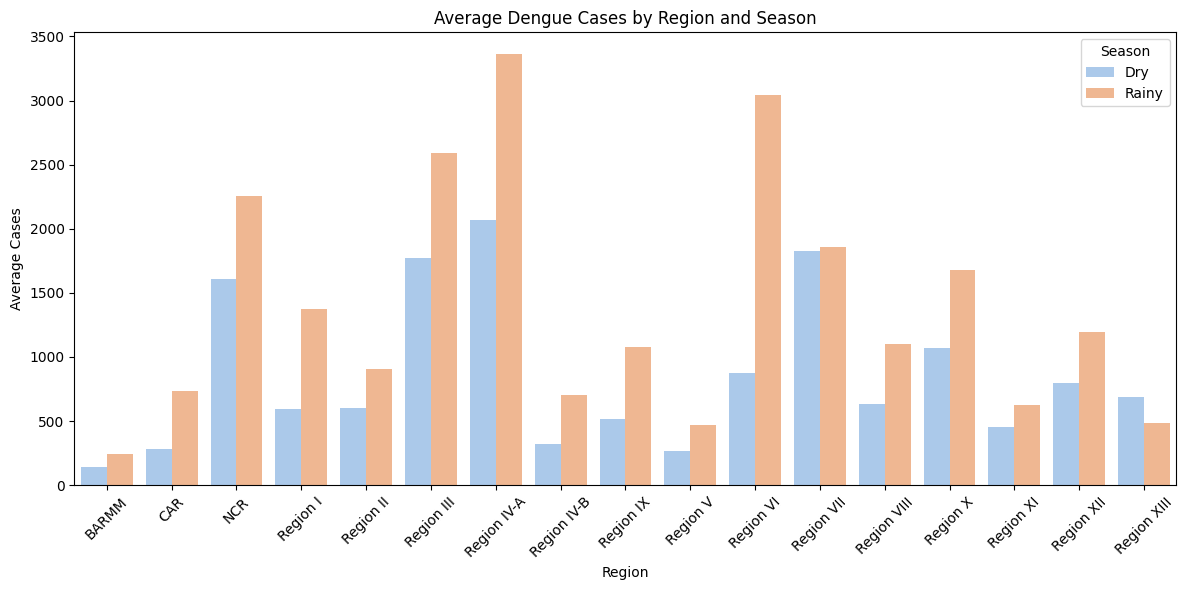

In [30]:
season_region = dengue.groupby(['Region', 'Season'])[['Dengue_Cases', 'Dengue_Deaths', 'Fatality_Rate']].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Dengue_Cases', hue='Season', data=season_region, palette='pastel')
plt.title('Average Dengue Cases by Region and Season')
plt.xticks(rotation=45)
plt.ylabel('Average Cases')
plt.tight_layout()
plt.show()